In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency, beta, binom
from statsmodels.stats.proportion import proportions_ztest
from matplotlib.lines import Line2D
import plotly.graph_objs as go


In [6]:
data_frame = pd.read_csv('../data/AdSmartABdata.csv')

Fetch our AdSmartABdata from our data folder

In [7]:
data = data_frame.query('yes == 1 | no == 1')

exposed = data.query('experiment == "exposed"')
control = data.query('experiment == "control"')

# number of observation in exposed and control groups
print('The exposed group = {} observations'. format(exposed.shape[0]))
print('The control group = {} observations'. format(control.shape[0]))

exposed_mean = '{0:.2f}%'.format(exposed.yes.mean()*100)
control_mean = '{0:.2f}%'.format(control.yes.mean()*100)
print('The conversion rate of exposed group = {}'.format(exposed_mean))
print('The conversion rate of control group = {}'.format(control_mean))

The exposed group = 657 observations
The control group = 586 observations
The conversion rate of exposed group = 46.88%
The conversion rate of control group = 45.05%


from the dataframe we got we can calculate the difference of yes' from both exposed and control group.

In [25]:
difference = exposed.yes.mean() - control.yes.mean()
difference_form = '{0:.2f}%'.format(difference*100)
print('Their difference is {}'.format(difference_form))

Their difference is 1.83%


calculating the sample size and conversion rate of both exposed and controled group from the data frame.

In [9]:
exposed_converted = exposed.query('yes == 1')
control_converted = control.query('yes == 1')
print('The sample sizes of the exposed group is {}'.format(exposed.shape[0]))
print('The sample sizes of the controled group is {}'.format(control.shape[0]))

print('The conversion rates for the exposed group and control group is {} and {} respectively'.format(exposed_converted.shape[0],control_converted.shape[0]))

The sample sizes of the exposed group is 657
The sample sizes of the controled group is 586
The conversion rates for the exposed group and control group is 308 and 264 respectively


In [10]:
exposed_converted = exposed.query('yes == 1')
control_converted = control.query('yes == 1')
print('The sample sizes of the exposed group is {}'.format(exposed.shape[0]))
print('The sample sizes of the controled group is {}'.format(control.shape[0]))

print('The conversion rates for the exposed group and control group is {} and {} respectively'.format(exposed_converted.shape[0],                                                                                        control_converted.shape[0]))

The sample sizes of the exposed group is 657
The sample sizes of the controled group is 586
The conversion rates for the exposed group and control group is 308 and 264 respectively


In [24]:
# calculating the p-value
# convert the groups in to an array
count = np.array([exposed_converted.shape[0], control_converted.shape[0]])
# converting the sample size to an array
sample = np.array([exposed.shape[0], control.shape[0]])
#storing results of z test in variables
stat, p_val = proportions_ztest(count, sample, alternative = 'larger')
print('{0:.2f}'.format(p_val))
p_value = '{0:.2f}%'.format(p_val*100)
print('P-value = {}'.format(p_value))

0.26
P-value = 25.92%


calculated p value is approximately 0.26 which is 26% which shows us that we cannot reject the null hypothesis.

In [12]:
exposed_simulation = np.random.binomial(exposed.shape[0], exposed.yes.mean(), 100000)/exposed.shape[0]
control_simulation = np.random.binomial(control.shape[0], control.yes.mean(), 100000)/control.shape[0]
p_diffs = exposed_simulation - control_simulation
diffs = np.array(p_diffs)

#Creation of normal distribution centered at zero
null_vals = np.random.normal(0, np.std(diffs), len(diffs))

In [13]:
def plot_result(data, lim, obs_stat, title):
    """
    This function creates a plot, that represents sampling distribution. 
    This plot is formatted and has main statistics on it
    Arguments:
    data = array
    lim = height of the plot
    obs_stat = observed statistic
    title = chart title.
    """
    
    #Create a kdeplot
    plt.figure(figsize=(12,4), tight_layout=True)
    ax = sns.kdeplot(data, linewidth = 0.8, color = 'black')
    
    # Simple formatting
    frame = ['right', 'left', 'top']
    for i in frame:
        ax.spines[i].set_visible(False)

    plt.title(title)
    plt.ylabel('')
    plt.yticks([], [])
    
    # Legend
    line = Line2D([0], [0], color='red', linestyle = '-', label='observed statistic')
    line_dashed = Line2D([0], [0], color='black', linestyle = '--', label='mean and standard deviation')
    plt.legend(handles=[line, line_dashed], loc='upper left');
    
    # Create a list of 3 standard deviation to the left and to the right and mean
    std_list = []
    std_list_format = []
    for i in range(-3,4):
        std_dev = np.std(data) * i + np.mean(data)
        std_list.append(std_dev)
        std_list_format.append('{0:.3f}'.format(std_dev) + '\n {} std'.format(i))
        
    # Create a list of corresponding y values
    data_x, data_y = ax.lines[0].get_data()
    height = []
    for i in std_list:
        height.append(np.interp(i, data_x, data_y))
        
    # Plotting vertical lines representing std deviations 
    for a, b in zip(std_list, height):
        plt.axvline(a, 0, b/lim, color = 'black', alpha = 1, linewidth = 0.8, linestyle = '--')
        plt.plot(a, b, marker = 'o', color = 'blue')
    
    # Plotting observed statistic
    obs_line_height = np.interp(obs_stat, data_x, data_y)
    plt.axvline(obs_stat, 0, obs_line_height/lim, color = 'red', alpha = 1, linewidth = 0.8, linestyle = '-')
    plt.plot(obs_stat, obs_line_height, marker = 'o', color = 'red')
            
    # Plotting x ticks
    x_ticks = std_list
    x_labels = std_list_format
    plt.xticks(x_ticks, x_labels)
    plt.ylim(0,lim)

The method "plot_result" is used to plot the results we got.

In [14]:
def shading(data, left, right, color):
    
    """
    This function shades areas of the kde plot.
    Arguments:
    data = array
    left = left boundary of the area to be shaded
    right = right boundary of the area to be shaded
    color = color
    """
    
    #Shading areas
    kde = stats.gaussian_kde(data)
    shade = np.linspace(left, right, 100)
    plt.fill_between(shade, kde(shade), color = color, alpha = 0.5);

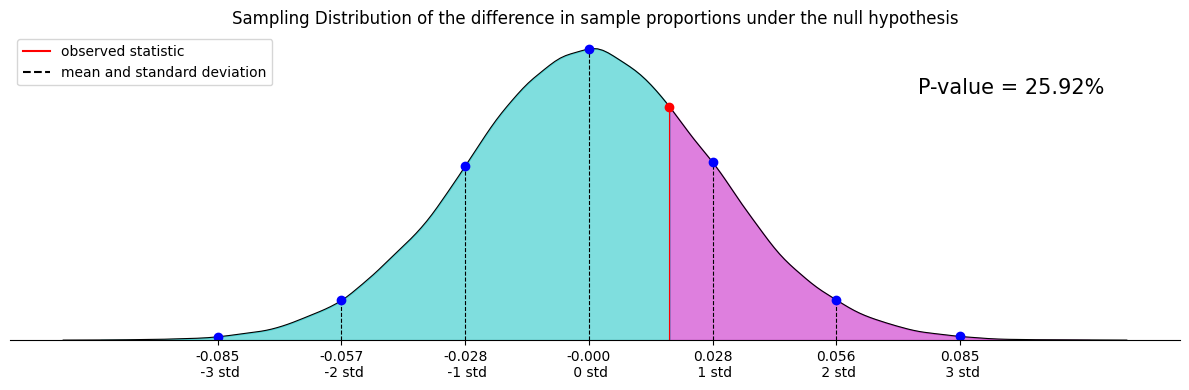

In [15]:
# Plotting the sampling distribution
plot_result(null_vals, 15, difference, 'Sampling Distribution of the difference in sample proportions under the null hypothesis')
shading(null_vals, difference, null_vals.max(),'m')
shading(null_vals, null_vals.min(), difference,'c')
plt.text(0.075, 12, "P-value = {}".format(p_value), color = 'black', size = 15);

In [16]:
# Calculate z statistic
zscore = stats.norm.ppf(1 - .05)

# Calculate mean proportion for exposed group
p1 = exposed.yes.mean()
# Calculate mean proportion for control group
p2 = control.yes.mean()
# Calculate distance from the mean
distance_from_mean = ((p1*(1-p1)/exposed.yes.shape[0]) + (p2*(1-p2)/control.yes.shape[0])) ** 0.5 * zscore

# Lower boarder of the interval
low = difference - distance_from_mean
# Higher boarder of the interval
high = difference + distance_from_mean

print('The 90% confidence interval falls between {} and {}.'.format(low, high))

The 90% confidence interval falls between -0.02828080835958243 and 0.06485204695055077.


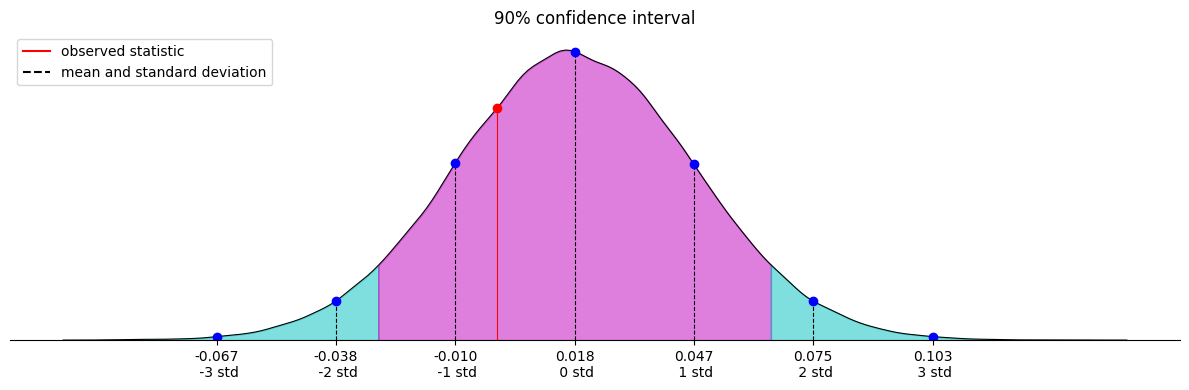

In [17]:
# Plotting the confidence interval
plot_result(diffs, 15, np.mean(null_vals), '90% confidence interval')
shading(diffs, diffs.min(), low, 'c')
shading(diffs, low, high, 'm')
shading(diffs, high, diffs.max(), 'c')

In [18]:
# performing experiment

control_conversion = data_frame[(data_frame['experiment'] == 'control') & (data_frame['yes'] == 1)].shape[0] / data_frame[(data_frame['experiment'] == 'control')].shape[0]
treatment_conversion = data_frame[(data_frame['experiment'] == 'exposed') & (data_frame['yes'] == 1)].shape[0] / data_frame[(data_frame['experiment'] == 'exposed')].shape[0]
lift = (treatment_conversion - control_conversion) / control_conversion


print(f"control conversion percentage: {round(control_conversion * 100, 2)}%")
print(f"Treatment conversion percentage: {round(treatment_conversion * 100, 2)}%")
print(f"Lift percentage: {round(lift * 100, 2)}%")

control conversion percentage: 6.48%
Treatment conversion percentage: 7.69%
Lift percentage: 18.56%
